# Damped Oscillations

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [21]:
# ================
# Global constants
# ================

pi = 3.1416

# integration time
ti = 0
tf = 10
t = np.arange(ti,tf,0.1)

# =======================
# Constant for particle 0
# =======================

res0_k = 155.0
par0_m = 100.0 # g
par0_A = 1.0 # cm
par0_phi = 0.0 # rad


# =======================
# Constant for particle 1
# =======================

par1_k = 18.0
par1_m = 2.0
par1_A = 2.0 # cm
par1_phi = 1.57 # rad
par1_w = math.sqrt(par1_k/par1_m)

In [22]:
def position (A0, b0, phi0, m0, k0, t0):
    c0 = b0 / (2. * m0 )
    w0 = math.sqrt( k0 / m0 - ( b0*b0 ) / (4*m0*m0) )
    x = A0 * math.exp( -c0 * t0 ) * math.cos(w0 * t0 + phi0)
    return x;

def b_par (b0, k0, m0):
    b = b0 * math.sqrt( k0 * m0 ) # g/s
    return b;

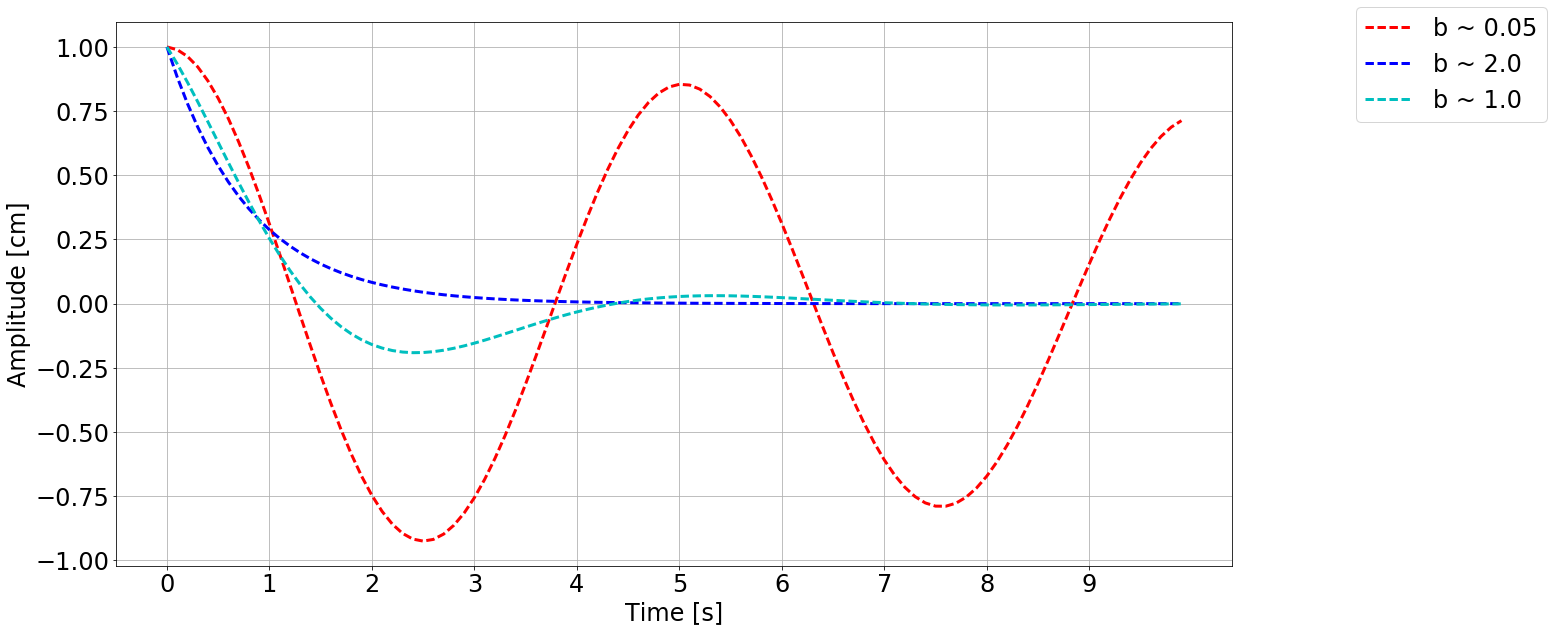

In [25]:
# Defining/Initilizing vector for movement equations

# Particle 0
par0_pos = []
par0_pos0 = []
par0_pos1 = []
bmag = 0.05
bmag0 = 2.
bmag1 = 1.

par0_b = b_par(bmag, res0_k, par0_m)
par0_b0 = b_par(bmag0, res0_k, par0_m)
par0_b1 = b_par(bmag1, res0_k, par0_m)


for i in t:    
    par0_pos.append(position( par0_A, par0_b, par0_phi, par0_m, res0_k, i ))
    par0_pos0.append(position( par0_A, par0_b0, par0_phi, par0_m, res0_k, i ))
    par0_pos1.append(position( par0_A, par0_b1, par0_phi, par0_m, res0_k, i ))
    
fig, ax = plt.subplots()

lw = 3.

ax.plot(t,par0_pos,'r--',linewidth=lw,label='b ~ '+str(bmag))
ax.plot(t,par0_pos0,'b--',linewidth=lw,label='b ~ '+str(bmag0))
ax.plot(t,par0_pos1,'c--',linewidth=lw,label='b ~ '+str(bmag1))

delta_xticks = tf / 10.
ax.xaxis.set_ticks(np.arange(ti, tf, delta_xticks))

plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05),fontsize=24)
plt.rcParams['figure.figsize'] = (20.0, 10.0)

plt.xlabel('Time [s]', fontsize=24)
plt.ylabel('Amplitude [cm]', fontsize=24)

plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)

plt.show()